# Experimentacion

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


def rmse(fitted, target):
    rmse = np.sqrt(mean_squared_error(target, fitted))
    return rmse

def adjusted_r2(p, fitted, target):
    n=len(target)
    return 1 - (1-r2_score(target, fitted)) * (n-1) / (n-p-1)

def standarized_residual_plot(predicted, actual):
    residuals = actual - predicted
    standarized_residuals = residuals/np.std(residuals)
    plt.scatter(predicted, standarized_residuals)
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos standarizados")
    plt.hlines(0, xmin=min(predicted), xmax=max(predicted))
    plt.title("Residuos standarizados")
    return standarized_residuals

def ols_influence(lm):
    plt.figure(figsize=(30,30))
    sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks")
    plt.show()

    
def run_analysis(predictors, dataset):
    target = dataset['Life expectancy']
    p=len(predictors)
    features= dataset[predictors].to_numpy()
    if len(predictors)>1:
        for i in range(0, len(predictors)):
            print(f"VIF for {predictors[i]} {variance_inflation_factor(features, i)}")

    features = sm.add_constant(features)
    regr = sm.OLS(target, features).fit()
    fitted = regr.predict(features)
    print(regr.summary())
    standarized_residuals = standarized_residual_plot(fitted, target)
    ols_influence(regr)
    #sm.qqplot(regr.resid)
    plt.figure()
    plt.hist(regr.resid)
    plt.show()
    return {
        'model': regr,
        'r2':r2_score(target, fitted),
        'rmse':rmse(fitted, target),
        'adjusted':adjusted_r2(p, fitted, target),
        'standarized_residuals': standarized_residuals,
        'fitted': fitted
    }

def residuos(predictors, dataset):
    target = dataset['Life expectancy']
    p=len(predictors)
    features= dataset[predictors].to_numpy()
    if len(predictors)>1:
        for i in range(0, len(predictors)):
            print(f"VIF for {predictors[i]} {variance_inflation_factor(features, i)}")

    features = sm.add_constant(features)
    regr = sm.OLS(target, features).fit()
    fitted = regr.predict(features)
    standarized_residuals = standarized_residual_plot(fitted, target)
    return np.array(standarized_residuals)


df = pd.read_csv("expectativa_de_vida.csv")

#### Como la cantidad de filas (paises) en el dataset no es demasiado significativa (miles y miles de elementos), no hare un train set que intente ser un fiel representante de todos los datos de la tabla. Sino que utilizare a todos los paises del dataset para realizar experimentos. 
#### En algunos casos, en vez de incluir a todos, me centrare en ciertos grupos en especifico, excluyendo a toda la muestra. Pero esto sera con la intencion de querer demostrar cierta anomalia o dato interesante que nos puedan proveer los datos. Como ejemplo, vere como segmentar y emplear regresion solo con paises encasillados en la condicion de 'Developing' y los que se encuentran en 'Developed'. Tambien habra un modelo con todos los paises, y otro donde no haya outliers. Se trataran a los outliers con suficiente detenimiento para entender su condicion, por que se salen tanto de la norma, son creibles sus datos? O simplemente estan encasillados en una categoria que no les corresponde si se la compara con el resto de su informacion?

In [3]:
df

,Unnamed: 0,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
1,1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing
2,2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
3,3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing
4,4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,...,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750,Developing
179,189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,...,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250,Developing
180,190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,...,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625,Developing
181,191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,...,5.824000,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

Vemos que 'Status' es de tipo object, no float, como nos es de sumo interes incluirlo en la experimentacion, proximamente vamos a hacer que tenga un valor numerico.

### Gracias al analisis exploratorio de datos provisto en 'EDA.ipynb' se puede descartar la siguiente data:

#### <b>Features 
 - **Hepatitis B**: Se correlaciona mucho con Polio y Diphteria
 - **Alcohol**: No parece ser un indicador que ayude a explicar la expectativa de vida
 - **GDP**: Puede ser reemplazado por Percentage Expenditure
 - **Population**: Se puede reemplazar por Infant Deaths y Under-Five Deaths
 - **Income Composition of Resources y Schooling**: Ambos correlacionan fuerte con BMI

#### <b> Paises
 - **Sudan, Sudan del Sur, Corea del Norte y Somalia**: Todos ellos tienen data incompleta

### Saco a los paises nombrados mas arriba del dataset

In [4]:
df_new = df[(df["Country"] != "South Sudan")] # Borro a Sudan del Sur

In [5]:
df_new = df_new[(df_new["Country"] != "Sudan")] # Borro a Sudan

In [6]:
df_new = df_new[(df_new["Country"] != "Democratic People's Republic of Korea")] # Borro a Corea del Norte

In [7]:
df_new = df_new[(df_new["Country"] != "Somalia")] # Borro a Somalia

In [8]:
print(df.shape) # Con todos los paises
print(df_new.shape) # Sin esos paises (TENGO QUE HACER MENOS REPETITIVA LA ELIMINACION DE PAISES > BUSCAR EN GOOGLE)

(183, 22)
(179, 22)


### Ya tengo mi muestra sin los paises que puedan llegar a truncar la experimentacion. Ahora me encargo de tener tres muestras distintas: Los paises de status 'Developing', los de estado 'Developed', y todas las naciones juntas.

In [9]:
df_developed = df_new[(df_new["Status"] == "Developed")] # Los developed
df_developing = df_new[(df_new["Status"] == "Developing")] # Los developing
# df_new es el que contiene a todas las naciones juntas

In [10]:
print(df_developed.shape)
print(df_developing.shape)

(32, 22)
(147, 22)


## Busco variables para mis muestras de regresion: Empiezo con el data set que contiene a todos los paises

In [27]:
df_new['Status_Float'] = df_new['Status'].apply(lambda x: 0 if x=='Developing' else 1)

In [28]:
df_new.corr()['Life expectancy']

Unnamed: 0                                     0.009284
Life expectancy                                1.000000
Adult Mortality                               -0.892716
infant deaths                                 -0.200913
Alcohol                                        0.453856
percentage expenditure                         0.523687
Hepatitis B                                    0.402502
Measles                                       -0.203355
BMI                                            0.722210
under-five deaths                             -0.226052
Polio                                          0.668041
Total expenditure                              0.279391
Diphtheria                                     0.658709
HIV/AIDS                                      -0.598270
GDP                                            0.609940
Population                                    -0.042260
thinness  1-19 years                          -0.523232
thinness 5-9 years                            -0

Veo que la columna con la que mas se correlaciona es 'Adult Mortality', hago un analisis entre ambas variables para ver que conclusiones puedo sacar de entrada

Primero normalizo las variables

In [13]:
features_a_normalizar = ['Life expectancy','Adult Mortality']
for feature in features_a_normalizar:
    df_new[f'Normalizado_{feature}'] = (df_new[feature]-np.mean(df_new[feature]))/np.std(df_new[feature])

Life expectancy normalizada

In [15]:
df_new[['Life expectancy', 'Normalizado_Life expectancy']]

,Life expectancy,Normalizado_Life expectancy
0,58.19375,-1.236622
1,75.15625,0.628375
2,73.61875,0.459329
3,49.01875,-2.245397
4,75.05625,0.617380
...,...,...
178,73.38750,0.433904
179,74.77500,0.586457
180,63.86250,-0.613353
181,53.90625,-1.708025


Adult mortality normalizada

In [16]:
df_new[['Adult Mortality', 'Normalizado_Adult Mortality']]

,Schooling,Normalizado_Schooling
0,8.21250,-1.292895
1,12.13750,0.014574
2,12.71250,0.206114
3,8.04375,-1.349107
4,8.84375,-1.082617
...,...,...
178,12.78750,0.231097
179,11.51250,-0.193622
180,8.50625,-1.195043
181,11.21250,-0.293556


Realizamos el analisis de la regresion

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     694.7
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           3.55e-63
Time:                        14:05:35   Log-Likelihood:                -506.49
No. Observations:                 179   AIC:                             1017.
Df Residuals:                     177   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4411      0.308    225.414      0.0

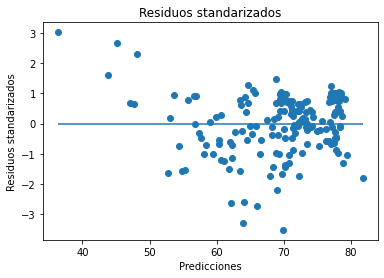

<Figure size 2160x2160 with 0 Axes>

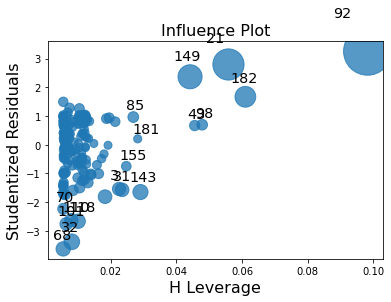

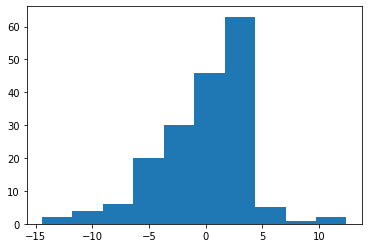

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fa88fa94c40>,
 'r2': 0.7969422820183526,
 'rmse': 4.098468280655677,
 'adjusted': 0.7957950632726936,
 'standarized_residuals': 0     -0.526640
 1     -1.050961
 2     -0.112012
 3     -1.526655
 4      0.640761
          ...   
 178    0.972609
 179    0.552622
 180   -0.335288
 181    0.201908
 182    1.617318
 Name: Life expectancy, Length: 179, dtype: float64,
 'fitted': array([60.35216543, 79.46357881, 74.07782894, 55.27569625, 72.43010943,
        74.26446384, 73.29396238, 77.91717538, 77.69854593, 73.48059728,
        70.33446617, 77.73054048, 71.24631095, 76.68538506, 64.64476804,
        77.31994371, 70.04118276, 60.3255033 , 63.66360173, 68.16416895,
        77.76786746, 45.07476607, 70.45177953, 77.58656499, 72.60074705,
        61.76525822, 58.43249221, 73.39527847, 66.55377641, 58.14987366,
        77.79452959, 54.89176161, 63.87689876, 77.8798484 , 77.01599545,
        72.70739556, 62.75175695, 

In [104]:
run_analysis(['Normalizado_Adult Mortality'], df_new)

Chequeo outliers basandome en las desviaciones de los residuos

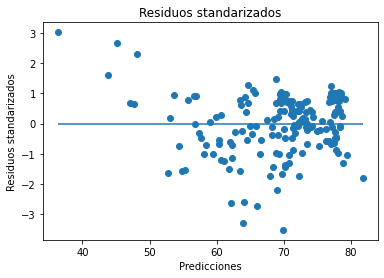

In [116]:
residuos_adult = residuos(['Normalizado_Adult Mortality'], df_new)

In [122]:
residuos_adult.shape

(179,)

/home/tincho/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

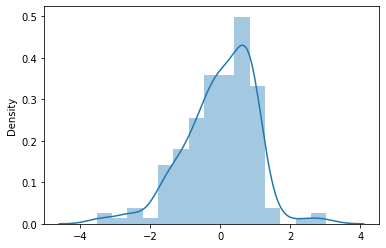

In [118]:
sns.distplot(residuos_adult)

tengo que atender los casos donde el modulo del residuo sea mayor a 2.5, ellos son outliers

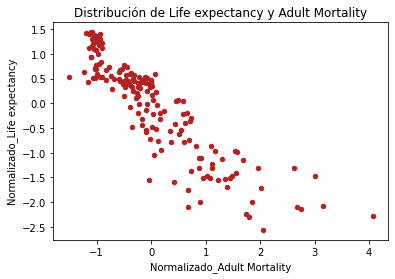

In [119]:
fig, ax = plt.subplots()

df_new.plot(
    x    = 'Normalizado_Adult Mortality',
    y    = 'Normalizado_Life expectancy',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Life expectancy y Adult Mortality');

<AxesSubplot:xlabel='Normalizado_Adult Mortality', ylabel='Count'>

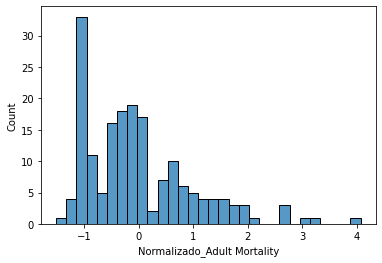

In [80]:
sns.histplot(df_new["Normalizado_Adult Mortality"], bins=30)

Notamos que tanto el R2 como el R2 ajustado nos muestran una performance bastante aceptable, por arriba de los 0.7, algo ideal en el analisis de datos. Ahora hay que chequear los graficos, como se interpretan?

In [81]:
np.where(df_new["Normalizado_Adult Mortality"] > 3)

(array([ 21,  91, 178]),)

### Interpretacion de los graficos ACA ->

### Agrego ahora el status de los paises como variable

VIF for Normalizado_Adult Mortality 1.1567230271897124
VIF for Status_Float 1.1567230271897122
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     400.1
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           3.34e-66
Time:                        12:50:42   Log-Likelihood:                -495.84
No. Observations:                 179   AIC:                             997.7
Df Residuals:                     176   BIC:                             1007.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

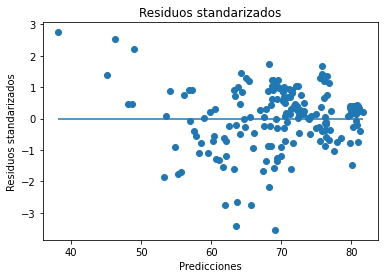

<Figure size 2160x2160 with 0 Axes>

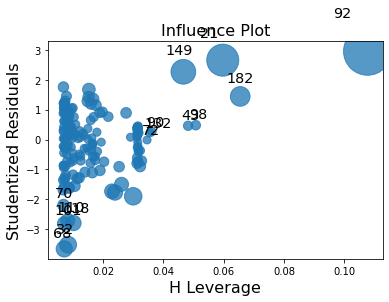

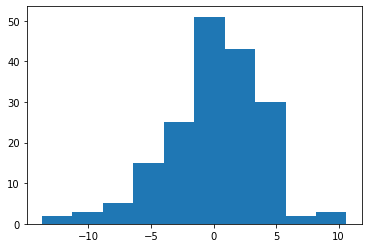

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fa88d735430>,
 'r2': 0.8197173350637883,
 'rmse': 3.8617914110837264,
 'adjusted': 0.8176686684167859,
 'standarized_residuals': 0     -0.554291
 1     -0.738875
 2      0.152822
 3     -1.714372
 4      0.919670
          ...   
 178    1.212920
 179    0.827685
 180   -0.256169
 181    0.077380
 182    1.400138
 Name: Life expectancy, Length: 179, dtype: float64,
 'fitted': array([60.3343058 , 78.00963146, 73.02858266, 55.63929743, 71.50467763,
        73.20119326, 72.30361813, 80.49967456, 80.29747357, 72.47622873,
        69.56650715, 76.40681873, 70.40983324, 75.44019935, 64.30434965,
        79.94732063, 69.29526192, 60.30964715, 63.39691106, 67.55929243,
        76.44134085, 46.20489509, 69.67500524, 76.27366198, 75.58273826,
        61.64121465, 58.55888247, 72.39732103, 66.06990952, 58.2975007 ,
        76.4659995 , 55.28421276, 63.59418032, 76.54490721, 75.74596671,
        71.76112766, 62.55358497,

In [50]:
run_analysis(['Normalizado_Adult Mortality', 'Status_Float'], df_new)

In [58]:
df.corr()["BMI"]

Unnamed: 0                         0.021571
Life expectancy                    0.723824
Adult Mortality                   -0.621810
infant deaths                     -0.286579
Alcohol                            0.450205
percentage expenditure             0.364079
Hepatitis B                        0.300396
Measles                           -0.309725
BMI                                1.000000
under-five deaths                 -0.300138
Polio                              0.506371
Total expenditure                  0.391820
Diphtheria                         0.492614
HIV/AIDS                          -0.340577
GDP                                0.466903
Population                        -0.149859
thinness  1-19 years              -0.714633
thinness 5-9 years                -0.717365
Income composition of resources    0.681697
Schooling                          0.721263
Name: BMI, dtype: float64

VIF for BMI 1.3845854353133478
VIF for Status_Float 1.384585435313348
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     120.0
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           1.36e-33
Time:                        13:06:25   Log-Likelihood:                -572.21
No. Observations:                 179   AIC:                             1150.
Df Residuals:                     176   BIC:                             1160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

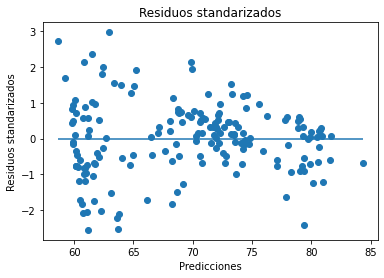

<Figure size 2160x2160 with 0 Axes>

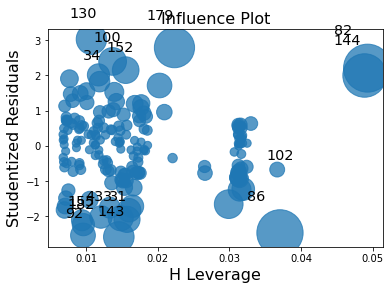

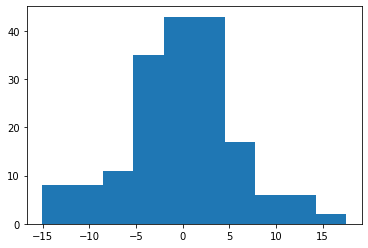

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fa88d529850>,
 'r2': 0.5768273965204069,
 'rmse': 5.9165780692373335,
 'adjusted': 0.5720186169354116,
 'standarized_residuals': 0     -0.338272
 1      0.507565
 2      0.267280
 3     -2.039603
 4      1.131860
          ...   
 178   -0.117818
 179    2.725157
 180   -0.462626
 181   -1.179272
 182   -2.220205
 Name: Life expectancy, Length: 179, dtype: float64,
 'fitted': array([60.19515982, 72.15320314, 72.03736516, 61.08622117, 68.35950944,
        74.26056323, 70.59830108, 80.64443397, 77.94451808, 70.29088492,
        73.5120717 , 73.07545164, 59.25286244, 71.05051472, 74.1759124 ,
        78.87344954, 68.09219103, 61.65427278, 60.93028543, 70.63839884,
        72.11533303, 66.15636025, 71.4381264 , 65.25638829, 80.15880554,
        60.18847686, 60.12164725, 63.35174465, 60.13946848, 63.08219859,
        74.57466236, 60.75430081, 60.48029945, 74.47664561, 62.43617911,
        72.32250479, 61.17087199,

In [57]:
run_analysis(['BMI', 'Status_Float'], df_new)

In [65]:
df_new.iloc[133]

Unnamed: 0                                             141
Country                                             Rwanda
Life expectancy                                    59.3125
Adult Mortality                                    246.812
infant deaths                                        20.75
Alcohol                                              5.636
percentage expenditure                             20.1914
Hepatitis B                                             96
Measles                                            505.875
BMI                                                  14.75
under-five deaths                                  32.0625
Polio                                                 88.5
Total expenditure                                  6.35067
Diphtheria                                          89.375
HIV/AIDS                                             4.425
GDP                                                300.018
Population                                     3.73551e+

Que pasa si me deshago de los outliers?

### Deshaciendome de los outliers

<AxesSubplot:xlabel='Normalizado_Adult Mortality', ylabel='Count'>

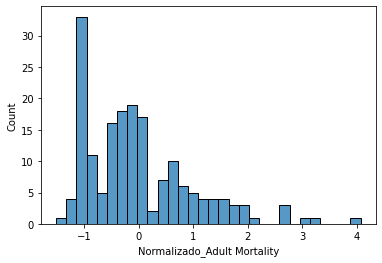

In [76]:
np.where(df_new["Normalizado_Adult Mortality"] > 3)

(array([ 21,  91, 178]),)

Unnamed: 0                                             192
Country                                           Zimbabwe
Life expectancy                                    50.4875
Adult Mortality                                    462.375
infant deaths                                      26.5625
Alcohol                                              4.482
percentage expenditure                             20.3643
Hepatitis B                                        70.5625
Measles                                                923
BMI                                                25.1375
under-five deaths                                  40.8125
Polio                                               75.625
Total expenditure                                  6.15867
Diphtheria                                         75.1875
HIV/AIDS                                           23.2625
GDP                                                 410.98
Population                                     8.02134e+